In [1]:
import math
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor# for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.decomposition import PCA
import os
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(1)

train_data = pd.read_csv('Dataset\\train.csv')
test_data = pd.read_csv('Dataset\\test.csv')
b_structure = pd.read_csv('Dataset\\Building_Structure.csv')
b_ownership = pd.read_csv('Dataset\\Building_Ownership_Use.csv')

c:\users\naimish\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print(train_data.shape)
print(test_data.shape)
print(b_structure.shape)
print(b_ownership.shape)

(631761, 14)
(421175, 13)
(1052948, 29)
(1052948, 17)


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 14 columns):
area_assesed                             631761 non-null object
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null float64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       598344 non-null float64
vdcmun_id                                631761 non-null int64


In [4]:
train_data.isnull().any()

area_assesed                             False
building_id                              False
damage_grade                             False
district_id                              False
has_geotechnical_risk                    False
has_geotechnical_risk_fault_crack        False
has_geotechnical_risk_flood              False
has_geotechnical_risk_land_settlement    False
has_geotechnical_risk_landslide          False
has_geotechnical_risk_liquefaction       False
has_geotechnical_risk_other              False
has_geotechnical_risk_rock_fall          False
has_repair_started                        True
vdcmun_id                                False
dtype: bool

In [5]:
train_data.describe()

,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
count,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,598344.000000,631761.000000
mean,26.831720,0.123920,0.042708,0.009263,0.034602,0.069629,0.002319,0.001061,0.034853,0.316076,2712.186552
std,7.771394,0.329491,0.202197,0.095798,0.182769,0.254521,0.048099,0.032548,0.183408,0.464943,777.505768
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2242.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2703.000000
75%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3119.000000
max,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5142.000000


In [6]:
train_data.isnull().sum()

area_assesed                                 0
building_id                                  0
damage_grade                                 0
district_id                                  0
has_geotechnical_risk                        0
has_geotechnical_risk_fault_crack            0
has_geotechnical_risk_flood                  0
has_geotechnical_risk_land_settlement        0
has_geotechnical_risk_landslide              0
has_geotechnical_risk_liquefaction           0
has_geotechnical_risk_other                  0
has_geotechnical_risk_rock_fall              0
has_repair_started                       33417
vdcmun_id                                    0
dtype: int64

In [7]:
test_data.isnull().any()

area_assesed                             False
building_id                              False
district_id                              False
has_geotechnical_risk                    False
has_geotechnical_risk_fault_crack        False
has_geotechnical_risk_flood              False
has_geotechnical_risk_land_settlement    False
has_geotechnical_risk_landslide          False
has_geotechnical_risk_liquefaction       False
has_geotechnical_risk_other              False
has_geotechnical_risk_rock_fall          False
has_repair_started                        True
vdcmun_id                                False
dtype: bool

In [8]:
test_data.isnull().sum()

area_assesed                                 0
building_id                                  0
district_id                                  0
has_geotechnical_risk                        0
has_geotechnical_risk_fault_crack            0
has_geotechnical_risk_flood                  0
has_geotechnical_risk_land_settlement        0
has_geotechnical_risk_landslide              0
has_geotechnical_risk_liquefaction           0
has_geotechnical_risk_other                  0
has_geotechnical_risk_rock_fall              0
has_repair_started                       21922
vdcmun_id                                    0
dtype: int64

In [9]:
train_data.head(10)

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627
5,Exterior,1f54965821f,Grade 5,21,0.0,0,0,0,0,0,0,0,0.0,2153
6,Both,2beb42eaeee,Grade 2,30,1.0,0,0,0,1,0,0,1,0.0,3018
7,Both,25e8adfd09a,Grade 5,26,0.0,0,0,0,0,0,0,0,0.0,2605
8,Both,1e96b58fa58,Grade 1,21,0.0,0,0,0,0,0,0,0,NaN,2102
9,Both,392cbd772c9,Grade 3,39,0.0,0,0,0,0,0,0,0,1.0,3929


In [10]:
train_data.isnull().sum()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 14 columns):
area_assesed                             631761 non-null object
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null float64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       598344 non-null float64
vdcmun_id                                631761 non-null int64


In [11]:
train_data.head(6)

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627
5,Exterior,1f54965821f,Grade 5,21,0.0,0,0,0,0,0,0,0,0.0,2153


In [12]:
b_structure.head(7)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear
5,a338a4e6b7,7,701,70103,2,0,35,589,18,0,...,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built
6,a338a4e71f,7,701,70103,1,1,44,546,9,9,...,0,0,0,0,1,1,0,0,0,Damaged-Not used


In [13]:
b_ownership.head(7)

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
5,a338a4e6b7,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
6,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [14]:
frame = [b_ownership,b_structure]
merge = pd.merge(b_ownership,b_structure)
merge

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear
5,a338a4e6b7,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built
6,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,0,Damaged-Not used
7,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Not used
8,a339d61353,7,701,70105,Private,1.0,0.0,0,0,0,...,1,0,0,0,1,1,0,0,0,Damaged-Rubble clear
9,a339d613bb,7,701,70105,Private,1.0,0.0,0,0,0,...,1,0,0,0,1,1,0,0,1,Damaged-Rubble clear


In [15]:
train_data = pd.merge(train_data,merge,on=['building_id'])
train_data

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Not used
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Not damaged
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Used in risk
5,Exterior,1f54965821f,Grade 5,21,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear
6,Both,2beb42eaeee,Grade 2,30,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,Damaged-Used in risk
7,Both,25e8adfd09a,Grade 5,26,0.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,Damaged-Rubble unclear
8,Both,1e96b58fa58,Grade 1,21,0.0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,Not damaged
9,Both,392cbd772c9,Grade 3,39,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used


In [16]:
train_data.to_csv('Dataset\\merge_file.csv',index=False)

In [17]:
train_data.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id                                     int64
legal_ownership_status                     object
count_families                            float64
has_secondary_use                         float64


In [18]:
train_data['damage_grade'].replace({'Grade 1':1,'Grade 2':2,'Grade 3':3,'Grade 4':4,'Grade 5':5},inplace=True)

In [19]:
train_data.head(5)

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,24385bfd2a2,4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Not used
1,Both,405d1bbebbf,2,44,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used
2,Both,351d9bc71f6,1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Not damaged
3,Building removed,2be3a971166,5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear
4,Both,34c7d073ea6,3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Used in risk


In [20]:
train_data.drop('building_id',axis=1,inplace=True)
train_data.head(5)

,area_assesed,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,4,24,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Not used
1,Both,2,44,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used
2,Both,1,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Not damaged
3,Building removed,5,30,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear
4,Both,3,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Used in risk


In [21]:
train_data = pd.get_dummies(train_data)

In [22]:
train_data.head(6)

,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged
0,4,24,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,44,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,30,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,21,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
train_data.dtypes

damage_grade                                                   int64
district_id_x                                                  int64
has_geotechnical_risk                                        float64
has_geotechnical_risk_fault_crack                              int64
has_geotechnical_risk_flood                                    int64
has_geotechnical_risk_land_settlement                          int64
has_geotechnical_risk_landslide                                int64
has_geotechnical_risk_liquefaction                             int64
has_geotechnical_risk_other                                    int64
has_geotechnical_risk_rock_fall                                int64
has_repair_started                                           float64
vdcmun_id_x                                                    int64
district_id_y                                                  int64
vdcmun_id_y                                                    int64
ward_id                           

In [24]:
train_data.isnull().any()

damage_grade                                                 False
district_id_x                                                False
has_geotechnical_risk                                        False
has_geotechnical_risk_fault_crack                            False
has_geotechnical_risk_flood                                  False
has_geotechnical_risk_land_settlement                        False
has_geotechnical_risk_landslide                              False
has_geotechnical_risk_liquefaction                           False
has_geotechnical_risk_other                                  False
has_geotechnical_risk_rock_fall                              False
has_repair_started                                            True
vdcmun_id_x                                                  False
district_id_y                                                False
vdcmun_id_y                                                  False
ward_id                                                      F

In [25]:
merge.fillna(0,inplace=True)
merge.isnull().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
legal_ownership_status                    0
count_families                            0
has_secondary_use                         0
has_secondary_use_agriculture             0
has_secondary_use_hotel                   0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school                  0
has_secondary_use_industry                0
has_secondary_use_health_post             0
has_secondary_use_gov_office              0
has_secondary_use_use_police              0
has_secondary_use_other                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq               

In [26]:
test_data.head(5)

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701


In [27]:
frame = [b_ownership,b_structure]
merge = pd.merge(b_ownership,b_structure)
merge

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear
5,a338a4e6b7,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built
6,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,0,Damaged-Not used
7,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Not used
8,a339d61353,7,701,70105,Private,1.0,0.0,0,0,0,...,1,0,0,0,1,1,0,0,0,Damaged-Rubble clear
9,a339d613bb,7,701,70105,Private,1.0,0.0,0,0,0,...,1,0,0,0,1,1,0,0,1,Damaged-Rubble clear


In [28]:
test_data = pd.merge(test_data,merge,on='building_id')
test_data

,area_assesed,building_id,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,Damaged-Rubble Clear-New building built
5,Both,6604e4896c6,7,0.0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,Damaged-Used in risk
6,Both,a33b07430f,7,0.0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,Damaged-Repaired and used
7,Building removed,a33c386cf3,7,0.0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble Clear-New building built
8,Both,a33c386ee7,7,0.0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
9,Both,a33c38700f,7,0.0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,Damaged-Not used


In [29]:
test_data.drop('building_id',axis=1,inplace=True)

In [30]:
test_data.isnull().sum()

area_assesed                                  0
district_id_x                                 0
has_geotechnical_risk                         0
has_geotechnical_risk_fault_crack             0
has_geotechnical_risk_flood                   0
has_geotechnical_risk_land_settlement         0
has_geotechnical_risk_landslide               0
has_geotechnical_risk_liquefaction            0
has_geotechnical_risk_other                   0
has_geotechnical_risk_rock_fall               0
has_repair_started                        21922
vdcmun_id_x                                   0
district_id_y                                 0
vdcmun_id_y                                   0
ward_id                                       0
legal_ownership_status                        0
count_families                                0
has_secondary_use                             0
has_secondary_use_agriculture                 0
has_secondary_use_hotel                       0
has_secondary_use_rental                

In [31]:
test_data = pd.get_dummies(test_data)
test_data.head(5)

,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged
0,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,1,0,0,0,0
3,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
test_data.fillna(0,inplace=True)

In [33]:
print(test_data.shape)
print(train_data.shape)

(421175, 94)
(631761, 95)


In [34]:
test_data.fillna(0,inplace=True)
train_data.fillna(0,inplace=True)

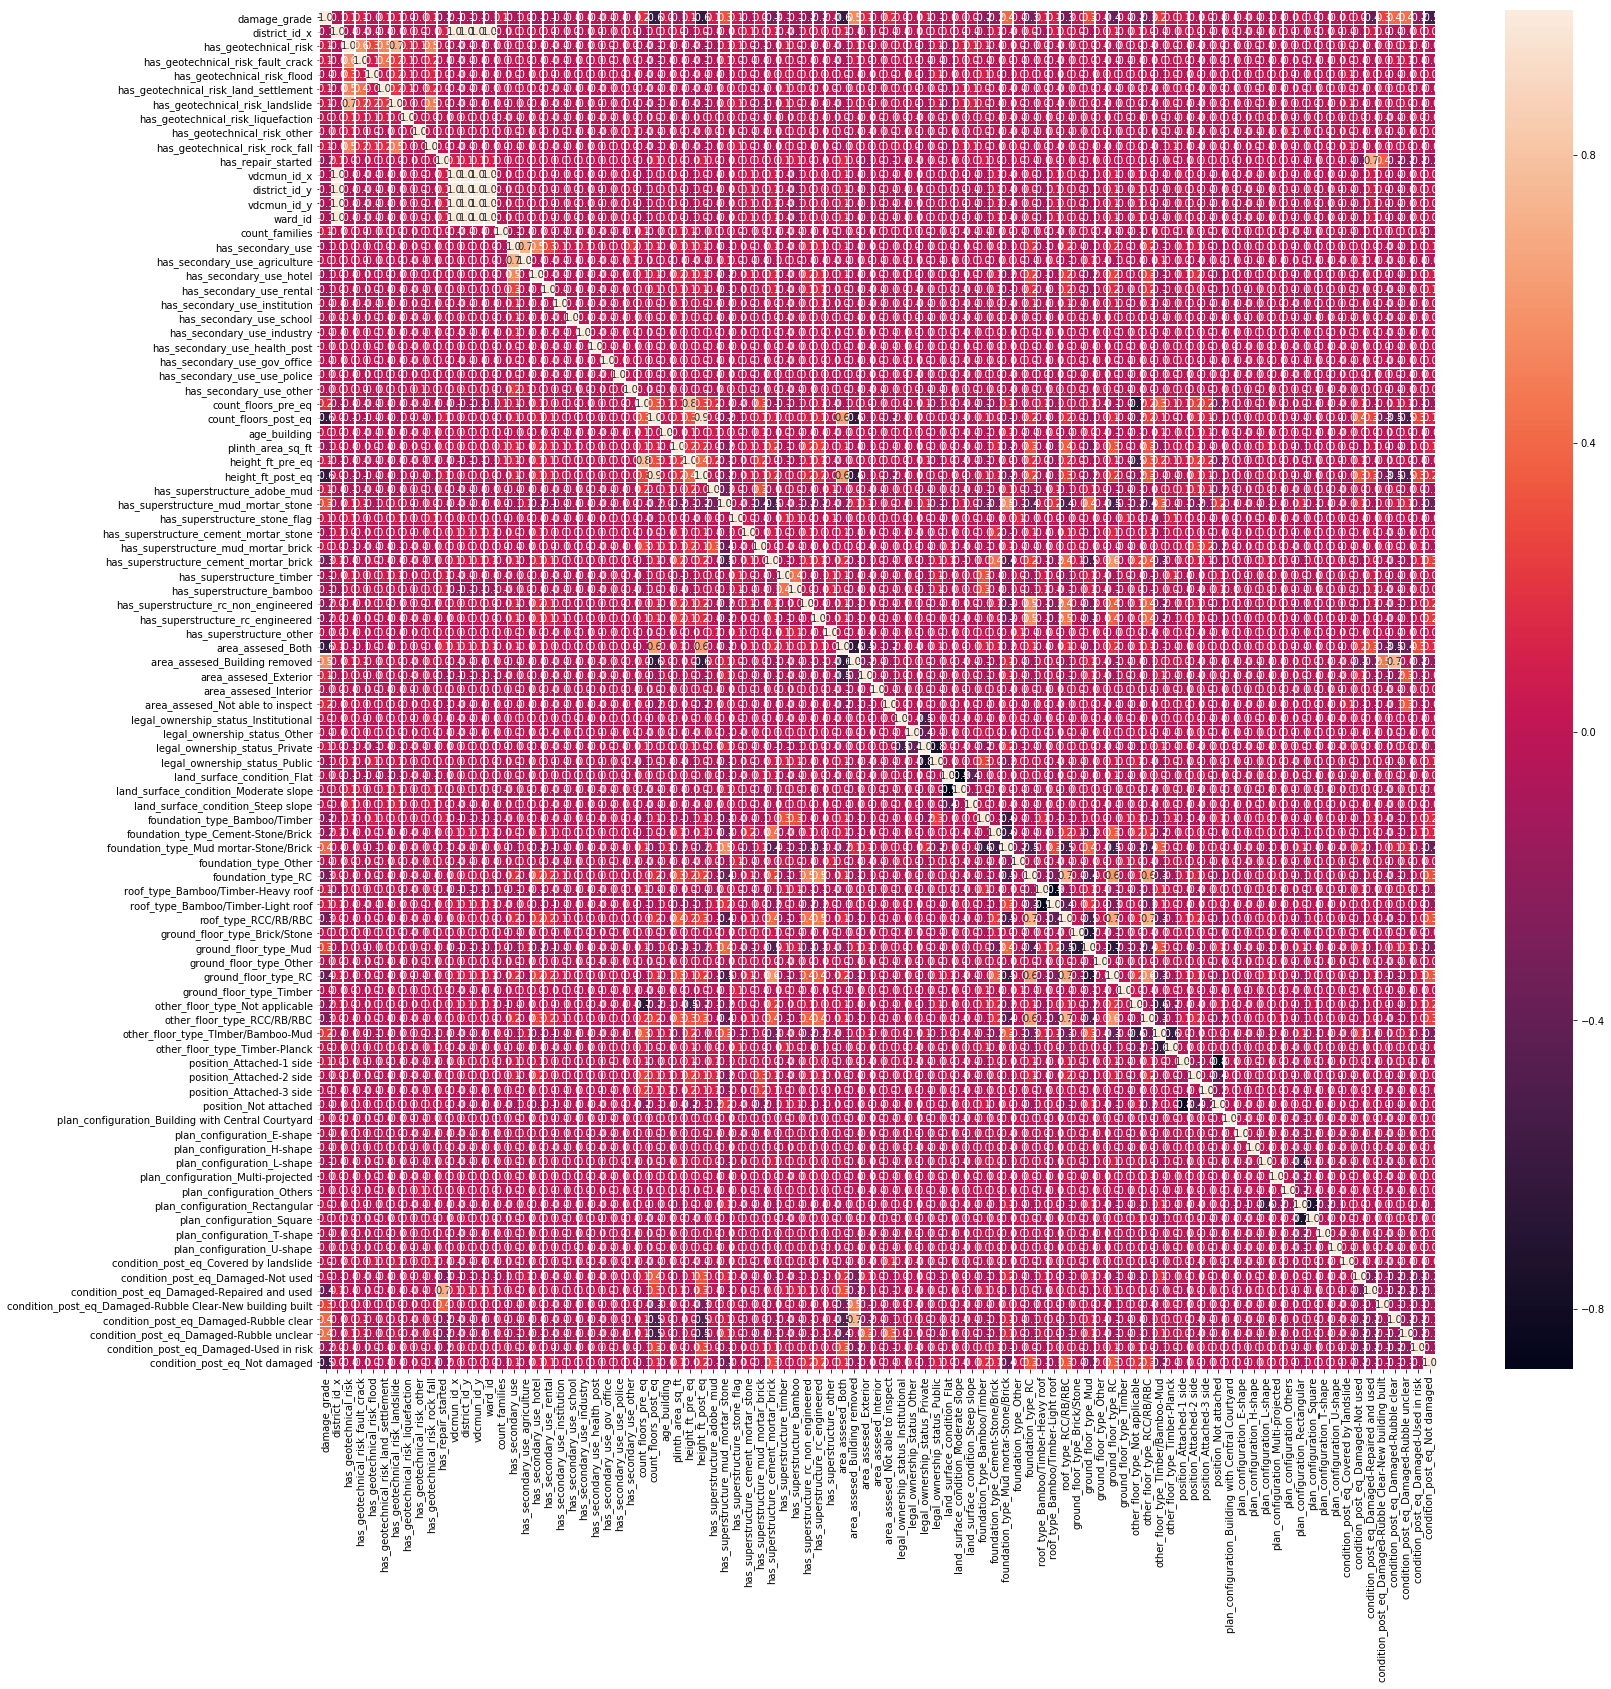

In [35]:
f,ax = plt.subplots(figsize=(25,25))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

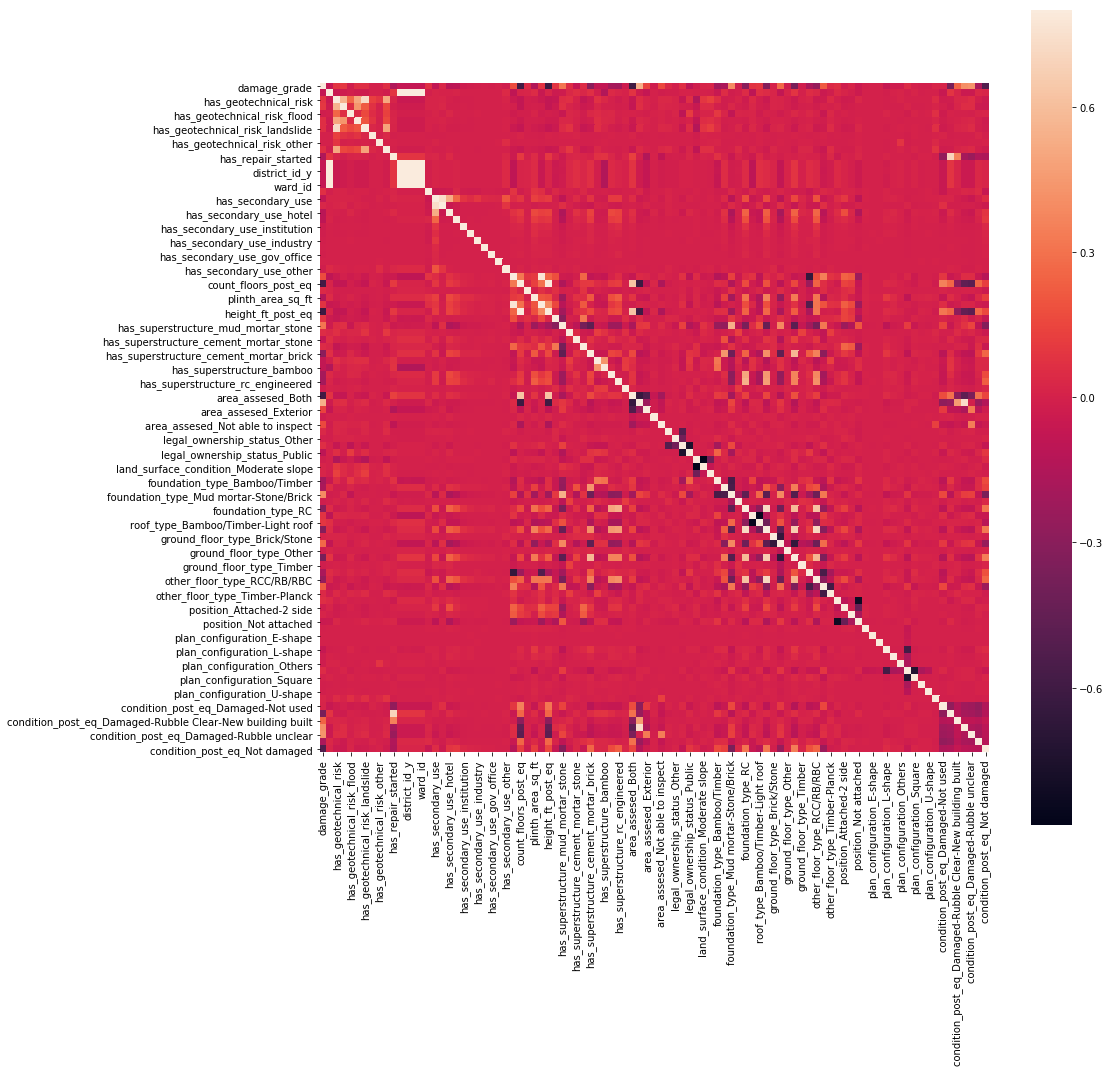

In [36]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

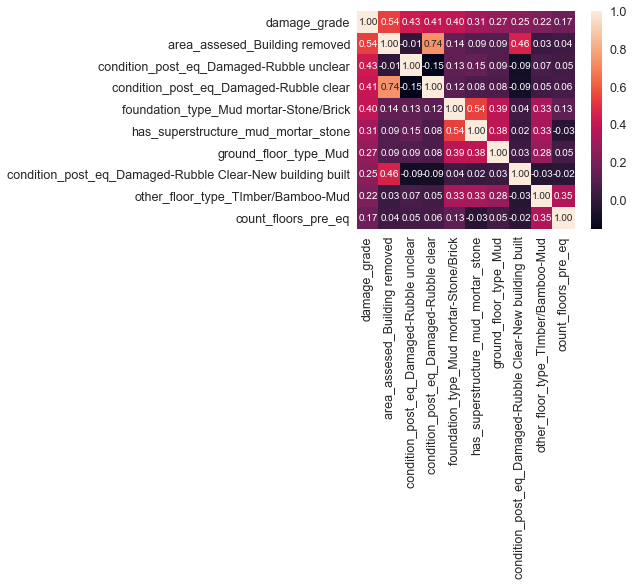

In [37]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'damage_grade')['damage_grade'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [46]:
model = RandomForestClassifier(n_estimators=20,max_depth=30)
model.fit(train_data.drop('damage_grade',axis=1),train_data['damage_grade'])
prediction = model.predict(test_data)
acc = model.score(train_data.drop('damage_grade',axis=1),train_data['damage_grade'])
print('Training Score: ',100*acc,'%')

Training Score:  94.69229661216822 %


In [47]:
submission = pd.read_csv('Dataset\\sample_submission.csv')
submission['damage_grade'] = prediction
submission.to_csv('Dataset\\sample_submission1.csv',index=False)

In [48]:
submission = pd.read_csv('Dataset\\sample_submission1.csv')
submission['damage_grade'].replace({1:'Grade 1',2:'Grade 2',3:'Grade 3',4:'Grade 4',5:'Grade 5'},inplace=True)
submission

,building_id,damage_grade
0,a3380c4f75,Grade 2
1,a338a4e653,Grade 5
2,a338a4e6b7,Grade 5
3,a33a6eaa3a,Grade 3
4,a33b073ff6,Grade 5
5,6604e4896c6,Grade 4
6,a33b07430f,Grade 3
7,a33c386cf3,Grade 5
8,a33c386ee7,Grade 3
9,a33c38700f,Grade 3


In [49]:
submission.to_csv('Dataset\\sample_submission1.csv',index=False)